# Workshop #5. Basics of `scanpy`

## Task 1

Number of UMIs per cell in the dataset is distributed (approximately) bimodally. What is the reason for that? Please provide some papers and/or resourses when this phenomenon is described.

Found info here: https://hbctraining.github.io/scRNA-seq/lessons/04_SC_quality_control.html

Maybe different cell types (biological reason), maybe some cells "failed" (technical reasonos)

## Task 2

Using [Cellxgene Portal](https://cellxgene.cziscience.com/) please select the dataset of your scientific interest and perform QC. Are you happy with it? Please save files in `loom` format and describe the features of such a format.

In [ ]:
import scanpy as sc
import seaborn as sns

!wget -O cellxgene_data.h5ad https://datasets.cellxgene.cziscience.com/43748e13-e24e-4d92-9848-5544596cdd34.h5ad
adata = sc.read_h5ad("cellxgene_data.h5ad")

[Text(0.5, 1.0, 'UMIs per cell')]

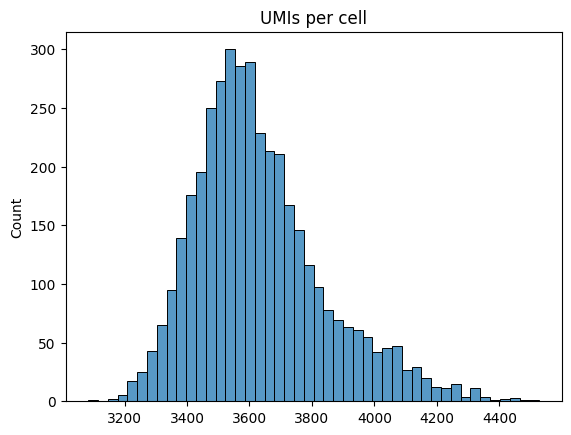

In [12]:
# UMI per cell distribution
counts_per_cell = adata.X.sum(axis=1).A.T[0]
sns.histplot(counts_per_cell).set(title='UMIs per cell')

Nice binomial! And no scond peak... I am happy!

[Text(0.5, 1.0, 'Genes per cell')]

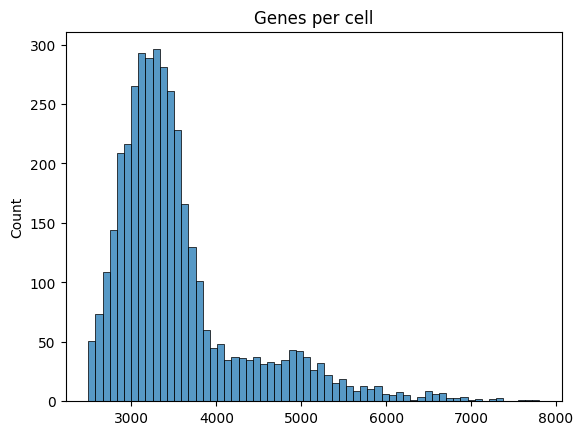

In [13]:
# Number of genes per cell distribution
genes_per_cell = (adata.X > 0).sum(axis=1).T.A[0]
sns.histplot(genes_per_cell).set(title='Genes per cell')

Oh, nice bimodal distribution with highly expressed genes cluster on the right, also very happy with this one!

[Text(0.5, 1.0, 'Mitochondrial gene percentage per cell')]

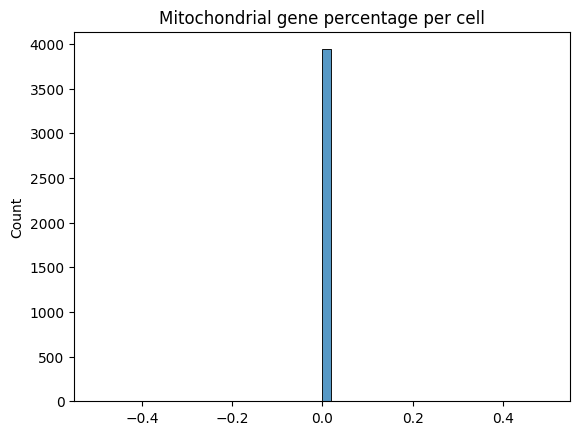

In [14]:
# Percentage of mitochondrial expression per cell distribution
adata.var["mt"] = adata.var_names.str.startswith("MT-")
mito_counts = adata[:, adata.var["mt"]].X.sum(axis=1).T.A[0]
mito_pct = mito_counts / counts_per_cell * 100
sns.histplot(mito_pct, bins=50).set(title='Mitochondrial gene percentage per cell')

Oh, it seems that MT genes are coded somehow else in this dataset, because it's not a human. So not happy now :(

In [16]:
# Save the processed data in loom format
adata.write_loom("processed_data.loom", write_obsm_varm=True)

Features of the Loom Format
1. Efficient Storage: loom files use HDF5, enabling efficient storage and fast access to large datasets
2. Sparse Matrix Support: Supports sparse matrices, which is beneficial for storing scRNA-seq data with many zeros
3. Compatibility: Compatible with several analysis tools, facilitating a seamless workflow for single-cell data analysis